In [1]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, 'functions')
sys.path.insert(0, 'training')

In [2]:
#from Clusterer import *
from plotting import *
from data_functions import *

import numpy as np
import compress_pickle as pickle  

### This notebook should remain unchanged, with the exception of editing the values in the cell directly below

In [3]:
label="Block_20230405_1613_concatTrue"
path = f"results/{label}"

NEvents_Max = 1_000_000 #OK if tree has less events than this
Energy_Bins = binning=np.linspace(0.1,110,21) #Plotting
take_log10 = False

Do_Processing = False
Do_Training = True
#saves to path/numpy_file. Only needs to be run frist time. 
# Change to False for messing with plots

### Load Strawman (cluster sum) and Generated Data

In [4]:
npz_unpacked = np.load(path+"/test_predictions.npz")
predictions = npz_unpacked['outputs']
targets = npz_unpacked['targets']

#means = pickle.load(f"preprocessed_data/means.p")

means = pickle.load(open(f"preprocessed_data/means.p", 'rb'), compression='gzip')
stdvs = pickle.load(open(f"preprocessed_data/stdvs.p", 'rb'), compression='gzip')

means.keys()
#Undo log: Exponentiate
#Averages and STdevs taken AFTER log10 taken. So undo scalar, then exp.
#scalar = (x-mean)/stdev
#undo_scalar = x'*stdev + mean

predictions = predictions*stdvs['genP'] + means['genP']
targets = targets*stdvs['genP'] + means['genP']

predictions = 10**predictions
targets = 10**targets

In [5]:
ClusterSum = predictions
GenP = targets


#### Plot Energy Distributions

In [6]:
#FIXME Adapt this to work with test_pickle_files!
#flat_hits_e = load_flat_hits_e(label)
#energy_QA_plots(flat_hits_e, GenP, ClusterSum, label)

#### Plot Clusters vs Generated

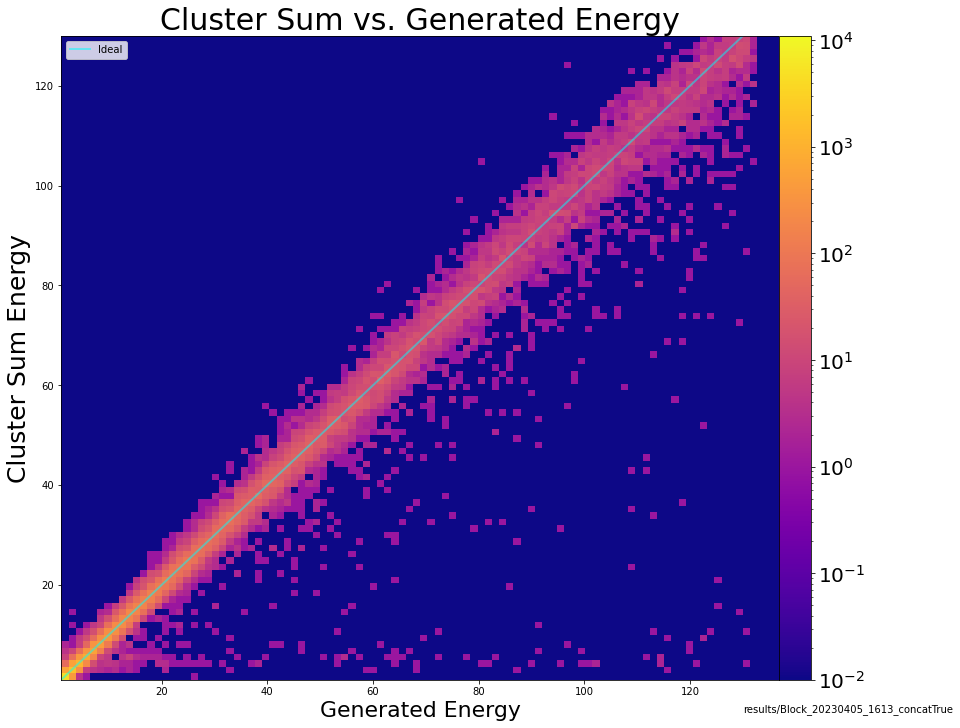

In [7]:
ClusterSum_vs_GenP(ClusterSum, GenP, path, take_log10)

In [8]:
npz_unpacked_loss = np.load(path+"/losses.npz")
loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']


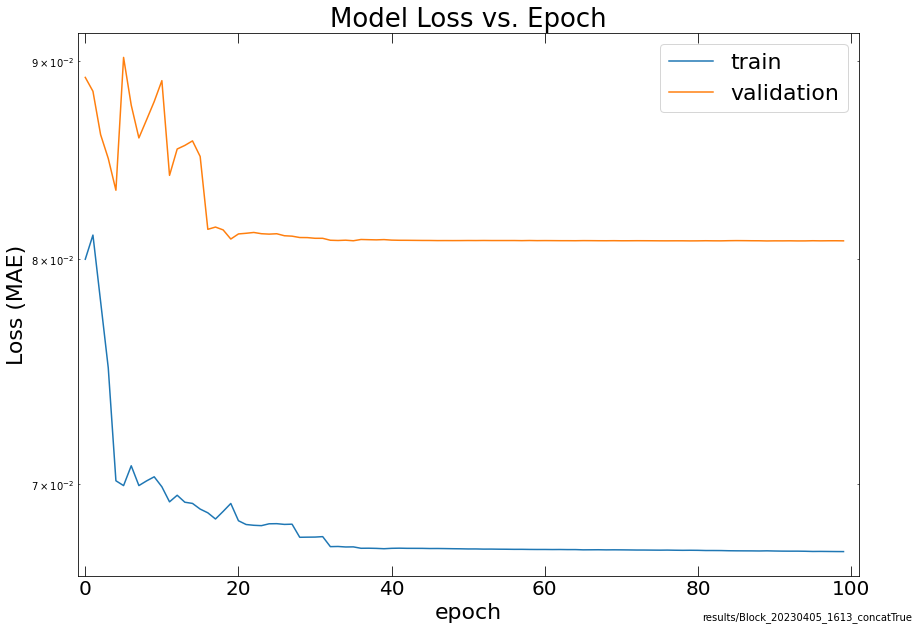

In [9]:
Plot_Loss_Curve(loss[:,-1],val_loss[:,-1],path,loss_string="MAE") #label loss yourself here

## Get Dictionaries with Resolution, Scale, and distributions

In [10]:
#NN = get_res_scale(y_test,preds,Energy_Bins,label)
NN = get_res_scale(targets,predictions,Energy_Bins,path)
#NN_in_RecoBins = get_res_scale_in_reco_bins(y_test,preds,x_test,Energy_Bins,label)

#strawman = get_res_scale(y_test,x_test,Energy_Bins)
#strawman_in_RecoBins = get_res_scale_in_reco_bins(y_test,x_test,x_test,Energy_Bins)

print(NN.keys())
strawman=None
#print(NN_in_RecoBins.keys())

dict_keys(['avg_truth', 'resolution', 'median_scale', 'avg_scale', 'slices', 'scale_array'])


In [11]:
print(NN["resolution"])

[0.53195397 0.24375158 0.17145688 0.14701569 0.12775741 0.11153335
 0.11283512 0.10139983 0.10150607 0.12735315 0.12039109 0.12645325
 0.1156185  0.09765648 0.11022251 0.11896763 0.12030114 0.1070503
 0.13027425 0.09697372 0.14512662]


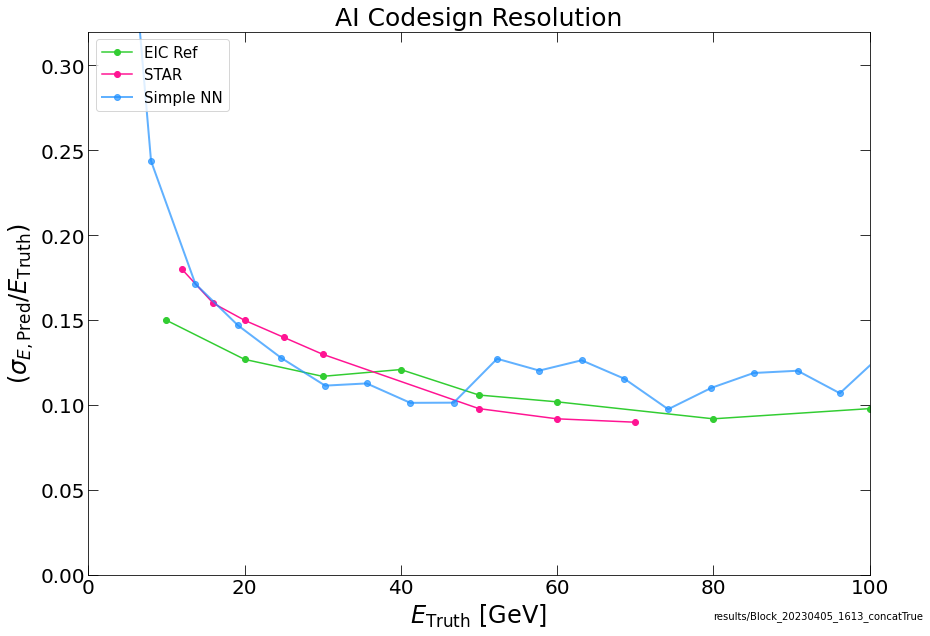

In [12]:
Plot_Resolutions(NN,strawman,path)

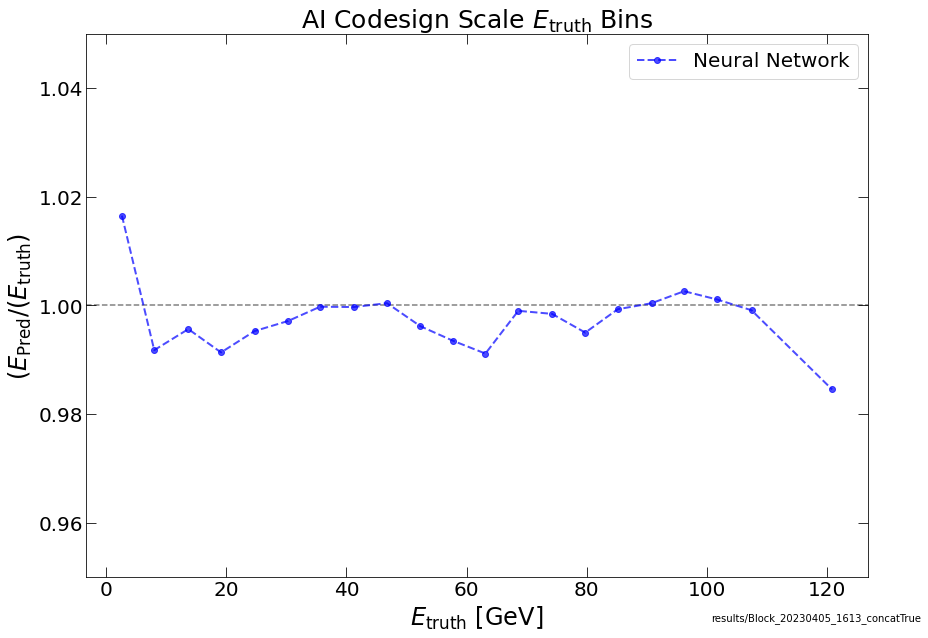

In [16]:
sampling_fraction=np.nan
Plot_Energy_Scale(NN,path,sampling_fraction,strawman)
#Plot_Energy_Scale(NN_in_RecoBins,label,sampling_fraction,None,"reco")

IndexError: index 2 is out of bounds for axis 0 with size 2

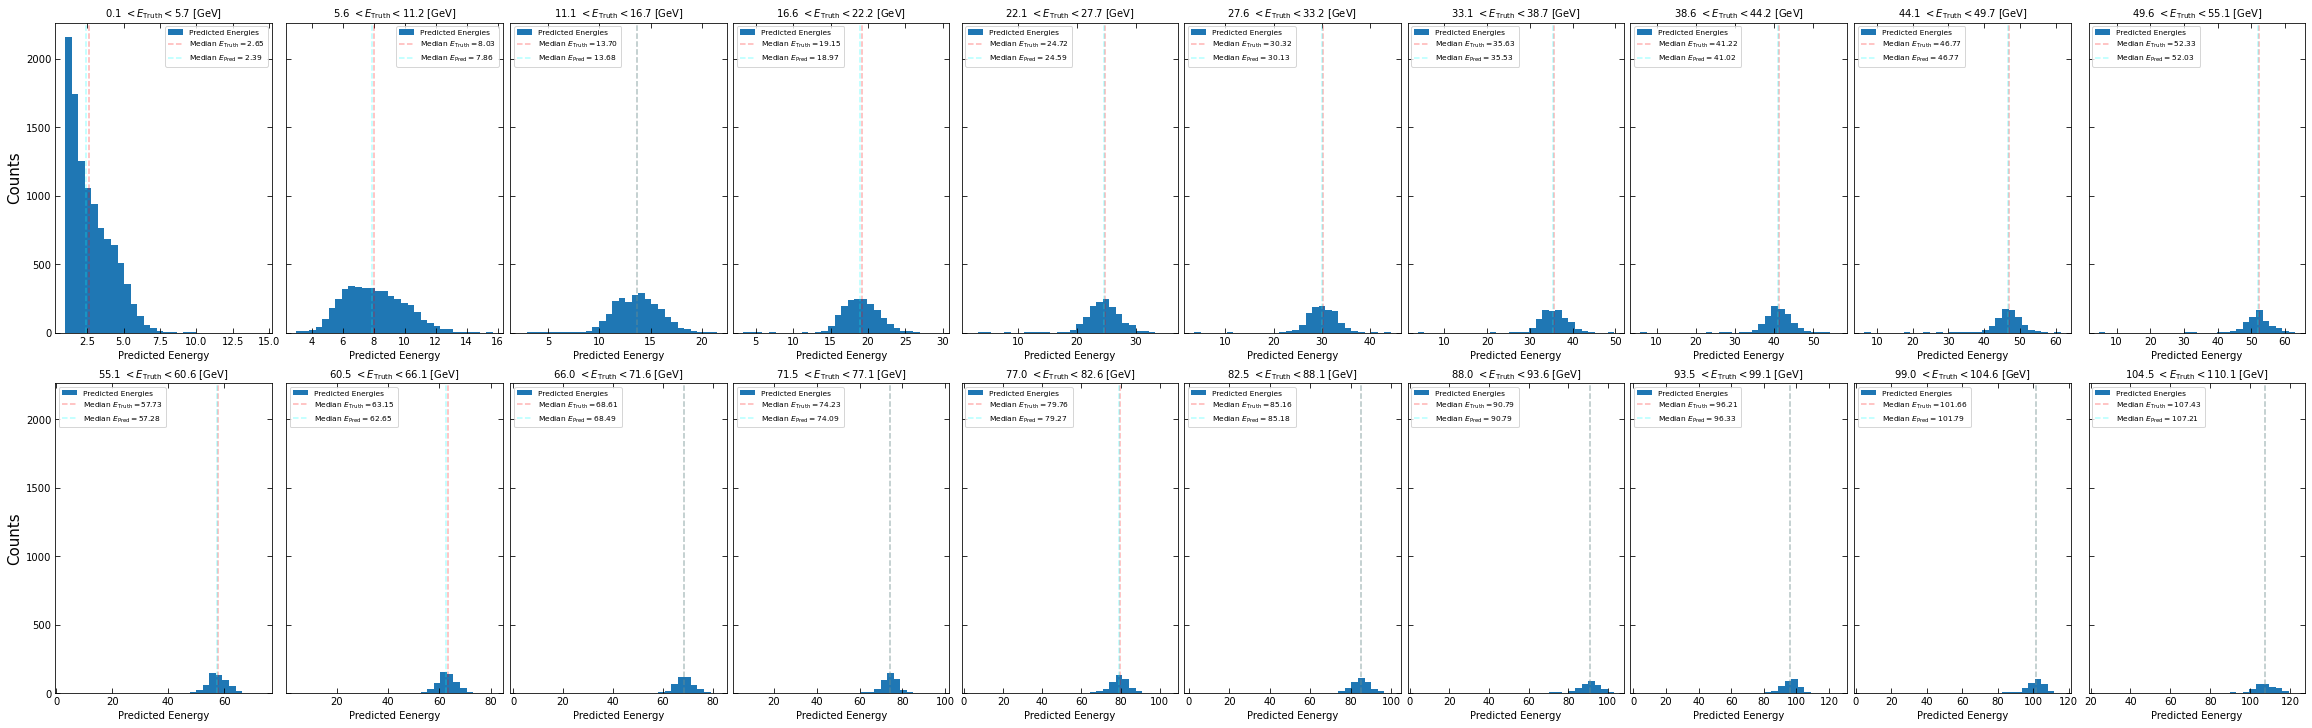

In [17]:
plot_slices(NN["slices"],NN['avg_truth'],label,Energy_Bins,"Truth",)

In [ ]:
plot_slices(NN["scale_array"],NN['avg_truth'],label, Energy_Bins,"Truth",scale=True)